# Calculo de la metalicidad de una muestra de galaxias

## Importa las librerias necesarias

In [4]:
!pip install --user PyNeb 

You should consider upgrading via the 'c:\users\sgong\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline
from os import getcwd
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn
import pandas as pd

## Ejecuta la llamada a la base de datos de blabla para obtener los datos

SELECT TOP 100
s.specObjID, s.oiii_4363_flux, s.oiii_4363_flux_err, s.oiii_4959_flux, s.oiii_4959_flux_err, s.oiii_5007_flux, s.oiii_5007_flux_err, s.sii_6717_flux, s.sii_6717_flux_err, s.sii_6731_flux, s.sii_6731_flux_err, s.h_beta_flux, s.h_beta_flux_err, s.specObjID

FROM
galSpecLine AS s


WHERE
s.oiii_4363_flux > 0 AND s.oiii_4363_flux > 3*s.oiii_4363_flux_err

Pero por lo que he visto, el método directo consiste simplemente en eso que comentáis, calcular cocientes de intensidades en I([OIII] 4363)/I(Hbeta), dividirlo por el cociente de emisividades de ambas especies a la temperatura electrónica (que se podría derivar -creo- por el cociente de 5007 y otra más) y multiplicarlo por una constante chachipiruli llamada "ICF", también conocida como "Ionization Correction Factor", que a partir de un n(OIII)/n(H) hace magia borrás y te da el cociente n(O)/n(H)

Derivar 12+log(O/H) con  el método directo y con alguna de las calibraciones de strong lines.
- Nos da la metalicidad

Lineas disponibles: specObjID	sigma_balmer	sigma_balmer_err	sigma_forbidden	sigma_forbidden_err	v_off_balmer	v_off_balmer_err	v_off_forbidden	v_off_forbidden_err	oii_3726_cont	oii_3726_cont_err	oii_3726_reqw	oii_3726_reqw_err	oii_3726_eqw	oii_3726_eqw_err	oii_3726_flux	oii_3726_flux_err	oii_3726_inst_res	oii_3726_chisq	oii_3729_cont	oii_3729_cont_err	oii_3729_reqw	oii_3729_reqw_err	oii_3729_eqw	oii_3729_eqw_err	oii_3729_flux	oii_3729_flux_err	oii_3729_inst_res	oii_3729_chisq	neiii_3869_cont	neiii_3869_cont_err	neiii_3869_reqw	neiii_3869_reqw_err	neiii_3869_eqw	neiii_3869_eqw_err	neiii_3869_flux	neiii_3869_flux_err	neiii_3869_inst_res	neiii_3869_chisq	h_delta_cont	h_delta_cont_err	h_delta_reqw	h_delta_reqw_err	h_delta_eqw	h_delta_eqw_err	h_delta_flux	h_delta_flux_err	h_delta_inst_res	h_delta_chisq	h_gamma_cont	h_gamma_cont_err	h_gamma_reqw	h_gamma_reqw_err	h_gamma_eqw	h_gamma_eqw_err	h_gamma_flux	h_gamma_flux_err	h_gamma_inst_res	h_gamma_chisq	oiii_4363_cont	oiii_4363_cont_err	oiii_4363_reqw	oiii_4363_reqw_err	oiii_4363_eqw	oiii_4363_eqw_err	oiii_4363_flux	oiii_4363_flux_err	oiii_4363_inst_res	oiii_4363_chisq	h_beta_cont	h_beta_cont_err	h_beta_reqw	h_beta_reqw_err	h_beta_eqw	h_beta_eqw_err	h_beta_flux	h_beta_flux_err	h_beta_inst_res	h_beta_chisq	oiii_4959_cont	oiii_4959_cont_err	oiii_4959_reqw	oiii_4959_reqw_err	oiii_4959_eqw	oiii_4959_eqw_err	oiii_4959_flux	oiii_4959_flux_err	oiii_4959_inst_res	oiii_4959_chisq	oiii_5007_cont	oiii_5007_cont_err	oiii_5007_reqw	oiii_5007_reqw_err	oiii_5007_eqw	oiii_5007_eqw_err	oiii_5007_flux	oiii_5007_flux_err	oiii_5007_inst_res	oiii_5007_chisq	hei_5876_cont	hei_5876_cont_err	hei_5876_reqw	hei_5876_reqw_err	hei_5876_eqw	hei_5876_eqw_err	hei_5876_flux	hei_5876_flux_err	hei_5876_inst_res	hei_5876_chisq	oi_6300_cont	oi_6300_cont_err	oi_6300_reqw	oi_6300_reqw_err	oi_6300_eqw	oi_6300_eqw_err	oi_6300_flux	oi_6300_flux_err	oi_6300_inst_res	oi_6300_chisq	nii_6548_cont	nii_6548_cont_err	nii_6548_reqw	nii_6548_reqw_err	nii_6548_eqw	nii_6548_eqw_err	nii_6548_flux	nii_6548_flux_err	nii_6548_inst_res	nii_6548_chisq	h_alpha_cont	h_alpha_cont_err	h_alpha_reqw	h_alpha_reqw_err	h_alpha_eqw	h_alpha_eqw_err	h_alpha_flux	h_alpha_flux_err	h_alpha_inst_res	h_alpha_chisq	nii_6584_cont	nii_6584_cont_err	nii_6584_reqw	nii_6584_reqw_err	nii_6584_eqw	nii_6584_eqw_err	nii_6584_flux	nii_6584_flux_err	nii_6584_inst_res	nii_6584_chisq	sii_6717_cont	sii_6717_cont_err	sii_6717_reqw	sii_6717_reqw_err	sii_6717_eqw	sii_6717_eqw_err	sii_6717_flux	sii_6717_flux_err	sii_6717_inst_res	sii_6717_chisq	sii_6731_cont	sii_6731_cont_err	sii_6731_reqw	sii_6731_reqw_err	sii_6731_eqw	sii_6731_eqw_err	sii_6731_flux	sii_6731_flux_err	sii_6731_inst_res	sii_6731_chisq	ariii7135_cont	ariii7135_cont_err	ariii7135_reqw	ariii7135_reqw_err	ariii7135_eqw	ariii7135_eqw_err	ariii7135_flux	ariii7135_flux_err	ariii7135_inst_res	ariii7135_chisq	oii_sigma	oii_flux	oii_flux_err	oii_voff	oii_chi2	oiii_sigma	oiii_flux	oiii_flux_err	oiii_voff	oiii_chi2	spectofiber

In [13]:
# Leo el fichero con los datos correspondientes a la llamada SQL
df = pd.read_csv(getcwd() + '/Datos/Datos1.csv')

$$ Cociente \: [O III] \rightarrow \frac{I (\lambda 4959 \: \unicode{x212B}) \: + (\lambda 5007 \: \unicode{x212B})}{I (\lambda 4363 \: \unicode{x212B})} = 8.32\:.\:e^{3.29\:.\:10^{4}\:/ T_{e}}$$
$$ \frac{I (\lambda 4959 \: \unicode{x212B}) \: + (\lambda 5007 \: \unicode{x212B})}{I (\lambda 4363 \: \unicode{x212B}) \: . \: 8.32} = e^{3.29\:.\:10^{4}\:/ T_{e}}$$
$$ ln(\frac{I (\lambda 4959 \: \unicode{x212B}) \: + (\lambda 5007 \: \unicode{x212B})}{I (\lambda 4363 \: \unicode{x212B}) \: . \: 8.32}) = \frac{3.29\:.\:10^{4}\:}{T_{e}}$$
$$ T_{e} = \frac{3.29\:.\:10^{4}\:}{ln(\frac{I (\lambda 4959 \: \unicode{x212B}) \: + (\lambda 5007 \: \unicode{x212B})}{I (\lambda 4363 \: \unicode{x212B}) \: . \: 8.32})}$$

Implementamos la ecuación final y calculamos la temperatura electrónica de todas la galaxias.

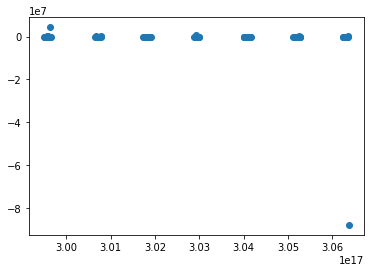

In [29]:
# Calculo el cociente de lineas para obtener la temperatura electronica de cada una de las galaxias
df['Te'] = 3.29e4 / np.log((df['oiii_4959_flux'] + df['oiii_5007_flux'])/df['oiii_4363_flux'])
plt.scatter(df['specObjID'], df['Te'])

Para el cálculo de la densidad electrónica haremos uso del modelo contenido en Castañeda et al 1992 (A&A, 260, 370)
$$ \frac{S_{31}}{S_{21}} = \frac{I (\lambda 6717 \: \unicode{x212B})}{I (\lambda 6731 \: \unicode{x212B})} = 1.45\frac{(1 + 4.18x)}{(1 + 13.42x)}$$
De donde deduce que x es igual a
$$ x = 10^{-6}n_{e}T_{e}^{1/2} $$
Calcularemos un columna intermedia con el valor de x
$$ \frac{I (\lambda 6717 \: \unicode{x212B})}{I (\lambda 6731 \: \unicode{x212B})\:.\:1.45} = \frac{(1 + 4.18x)}{(1 + 13.42x)}$$
$$ \frac{(1 + 13.42x)\:.\:I (\lambda 6717 \: \unicode{x212B})}{I (\lambda 6731 \: \unicode{x212B})\:.\:1.45} = (1 + 4.18x)$$
$$ (\frac{13.42\:.\:I (\lambda 6717 \: \unicode{x212B})}{I (\lambda 6731 \: \unicode{x212B})\:.\:1.45}\:-\:4.18).x= (1 - \frac{I (\lambda 6717 \: \unicode{x212B})}{I (\lambda 6731 \: \unicode{x212B})\:.\:1.45})$$
$$ x\:=\:\frac{(\frac{13.42\:.\:I (\lambda 6717 \: \unicode{x212B})}{I (\lambda 6731 \: \unicode{x212B})\:.\:1.45}\:-\:4.18)}{(1 - \frac{I (\lambda 6717 \: \unicode{x212B})}{I (\lambda 6731 \: \unicode{x212B})\:.\:1.45})}$$


In [18]:
# Guardamos el valor de x en una nueva columna de nuestra tabla
df['x'] =  ((13.42*df['sii_6717_flux'])/(df['sii_6731_flux']*1.45) - 4.18)/(1 - (df['sii_6717_flux'])/(df['sii_6731_flux']*1.45))

Despejamos el valor de $n_{3}$ en función de $x$ y $T_{e}$
$$ x\:=\:10^{-6}n_{e}T_{e}^{1/2} $$
$$ n_{e}\:=\:\frac{x}{10^{-6}T_{e}^{1/2}}$$

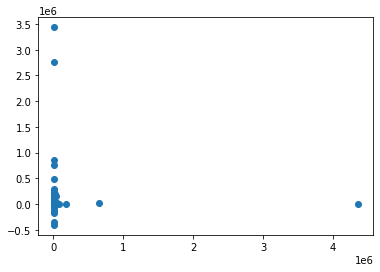

In [31]:
# Guardamos el valor de ne en una nueva columna de nuestra tabla
df['ne'] = df['x']/(10e-6*np.sqrt(df['Te']))
plt.scatter(df['Te'], df['ne'])

In [27]:
print(df['ne'])

0               NaN
1               NaN
2               NaN
3     101705.714932
4      69974.882089
          ...      
95              NaN
96    196785.272221
97      -261.848639
98     41513.966526
99              NaN
Name: ne, Length: 100, dtype: float64
